In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
def generator_network(latent_dim):
    input_layer = Input(shape=(latent_dim,))
    hidden_layer = Dense(128)(input_layer)
    hidden_layer = LeakyReLU(alpha=0.2)(hidden_layer)
    hidden_layer = Dense(256)(hidden_layer)
    hidden_layer = LeakyReLU(alpha=0.2)(hidden_layer)
    hidden_layer = Dense(512)(hidden_layer)
    hidden_layer = LeakyReLU(alpha=0.2)(hidden_layer)
    output_layer = Dense(1000, activation='tanh')(hidden_layer)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [3]:
def discriminator_network(input_dim):
    input_layer = Input(shape=(input_dim,))
    hidden_layer = Dense(512)(input_layer)
    hidden_layer = LeakyReLU(alpha=0.2)(hidden_layer)
    hidden_layer = Dropout(0.3)(hidden_layer)
    hidden_layer = Dense(256)(hidden_layer)
    hidden_layer = LeakyReLU(alpha=0.2)(hidden_layer)
    hidden_layer = Dropout(0.3)(hidden_layer)
    hidden_layer = Dense(128)(hidden_layer)
    hidden_layer = LeakyReLU(alpha=0.2)(hidden_layer)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [4]:
def gan_network(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam())
    discriminator.trainable = False
    input_layer = Input(shape=(latent_dim,))
    generated_data = generator(input_layer)
    output_layer = discriminator(generated_data)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model

In [5]:
num_epochs = 500
batch_size = 32
latent_dim = 100
input_dim = 1000

# Build the GAN model
generator = generator_network(latent_dim)
discriminator = discriminator_network(input_dim)
gan = gan_network(generator, discriminator)

c:\Users\afsal\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
import re
import string

def clean_text(text):
    if isinstance(text, str) or isinstance(text, bytes):
        # Remove any URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove any punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Convert the text to lowercase
        text = text.lower()
        return text
    
    return ""

In [8]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('WELFake_Dataset.csv')

# Remove any unnecessary columns
data = data[['text', 'label']]

# Remove any rows with empty text
data.dropna(subset=['text'], inplace=True)

# Clean the text data
data['text'] = data['text'].apply(clean_text)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)
train_seq = tokenizer.texts_to_sequences(train_data)
test_seq = tokenizer.texts_to_sequences(test_data)

# Pad the sequences
max_len = 1000
train_seq_pad = pad_sequences(train_seq, maxlen=max_len)
test_seq_pad = pad_sequences(test_seq, maxlen=max_len)

# Flatten the training sequence array
real_news = train_seq_pad.flatten()

In [9]:
for epoch in range(num_epochs):
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    generated_data = generator.predict(noise)
    idx = np.random.randint(10, size=32)
    real_data = train_seq_pad[idx]
    x = np.concatenate((real_data, generated_data))
    y = np.zeros(2*batch_size)
    y[:batch_size] = 1
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam())
    discriminator_loss = discriminator.train_on_batch(x, y)

    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    y = np.ones(batch_size)
    gan_loss = gan.train_on_batch(noise, y)

    if epoch % 100 == 0:
        print('Epoch:', epoch, 'Discriminator Loss:', discriminator_loss, 'GAN Loss:', gan_loss)


1/1 [==============================] - 2s 2s/step
Epoch: 0 Discriminator Loss: 54.5982780456543 GAN Loss: 0.6704100370407104
1/1 [==============================] - 0s 16ms/step
Epoch: 100 Discriminator Loss: 82.3272933959961 GAN Loss: 0.0007156240753829479
1/1 [==============================] - 0s 15ms/step
Epoch: 200 Discriminator Loss: 119.338623046875 GAN Loss: 0.0006981267943046987
1/1 [==============================] - 0s 15ms/step
Epoch: 300 Discriminator Loss: 128.8820037841797 GAN Loss: 0.000104808401374612
1/1 [==============================] - 0s 18ms/step
Epoch: 400 Discriminator Loss: 105.28038024902344 GAN Loss: 0.000115131915663369
1/1 [==============================] - 0s 15ms/step


In [10]:
import os.path
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem   import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

In [11]:
path = os.path.join('WELFake_Dataset.csv')
df = pd.read_csv(path, index_col=0)

In [12]:
#nltk.download()
def preprocess_text(text):
    text = ''.join([c for c in text if c not in string.punctuation and c not in string.digits])
    if(not text):
        return []
    tokens = word_tokenize(text, 'english')
    lemmatiser = WordNetLemmatizer()
    lemmatized = [lemmatiser.lemmatize(word) for word in tokens]
    sw = stopwords.words('english')
    stopped = [word for word in lemmatized if word.lower() not in sw]
    return stopped
preprocess_text(df.loc[0, 'title'])

['LAW',
 'ENFORCEMENT',
 'HIGH',
 'ALERT',
 'Following',
 'Threats',
 'Cops',
 'Whites',
 'BlackLivesMatter',
 'FYF',
 'Terrorists',
 'VIDEO']

In [13]:
from sklearn.model_selection import train_test_split

X = df['title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape[0], X_test.shape[0]

(57707, 14427)

In [14]:
y_train.value_counts(normalize=True)

1    0.513508
0    0.486492
Name: label, dtype: float64

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
X_train = X_train.fillna('')
bow_transformer = CountVectorizer(analyzer=preprocess_text).fit(X_train)
text_bow_train = bow_transformer.transform(X_train)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(n_estimators=300)

scores = cross_validate(model, text_bow_train, y_train, scoring=['f1', 'accuracy'], cv=5, n_jobs=-1)
pd.DataFrame(scores).describe()

,fit_time,score_time,test_f1,test_accuracy
count,5.000000,5.000000,5.000000,5.000000
mean,596.891989,3.397743,0.941104,0.938569
std,3.174878,0.156153,0.003098,0.003148
min,592.783703,3.196997,0.936658,0.933975
25%,594.569887,3.332512,0.940462,0.937960
50%,597.741369,3.395110,0.940471,0.938047
75%,598.746017,3.440125,0.943118,0.940565
max,600.618968,3.623969,0.944813,0.942298


In [17]:
model.fit(text_bow_train, y_train)

RandomForestClassifier(n_estimators=300)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

X_test = X_test.fillna('')
text_bow_test = bow_transformer.transform(X_test)
y_pred = model.predict(text_bow_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy : ", accuracy)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6954
           1       0.93      0.96      0.94      7473

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427

Model Accuracy :  0.939557773618909


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

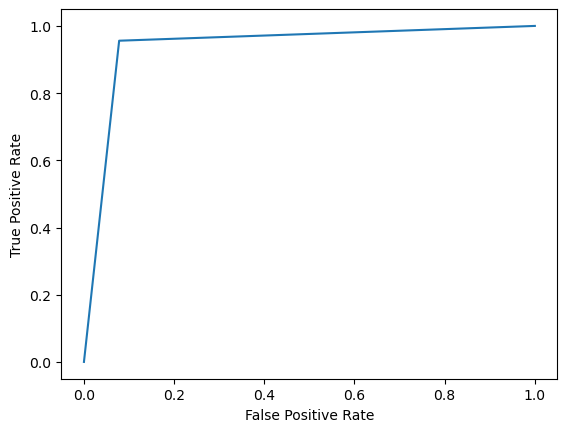

In [22]:
plot_roc_curve(y_test, y_pred)

<AxesSubplot:>

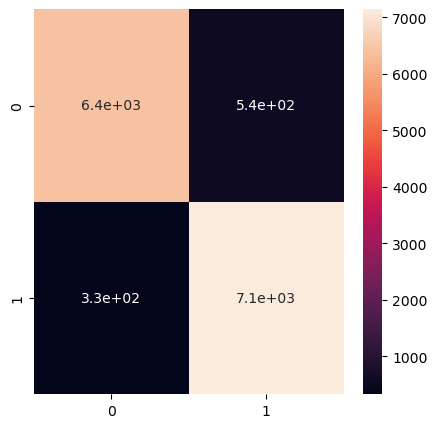

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True)